In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplt
import math as m
from tqdm import tqdm
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

zero_color = "#cfcc23"
one_color = "#208724"
two_color = "#c92f24"
grid_kws = {'width_ratios': (0.9, 0.05), 'wspace': 0.2}
colors = [zero_color, one_color, two_color]
c_map = matplt.colors.LinearSegmentedColormap.from_list("", colors)

# Declaring the global constants

In [ ]:
EMPTY = 0
TREE = 1
BURNING = 2

# Functions

In [ ]:
def init_forest(n, prob_tree, prob_burning):
    grid = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if(np.random.uniform(0,1) < prob_tree):
                if(np.random.uniform(0,1) < prob_burning):
                    grid[i][j] = BURNING
                else:
                    grid[i][j] = TREE
            else:
                grid[i][j] = EMPTY
    return grid

In [ ]:
def reflecting_lat(lat):
    lat_NS = np.row_stack((lat[0], lat, lat[-1]))
    return np.column_stack((lat_NS[:,0], lat_NS, lat_NS[:,-1]))

In [ ]:
def periodic_lat(lat):
    lat_NS = np.row_stack((lat[-1], lat, lat[0]))
    return np.column_stack((lat_NS[:,-1], lat_NS, lat_NS[:,0]))    

In [ ]:
def spread(site, N, E, S, W, prob_light, prob_immune):
    if(site == EMPTY or site == BURNING):
        return EMPTY
    else:
        if(N==BURNING or E==BURNING or S==BURNING or W==BURNING):
            if(np.random.uniform(0,1) < prob_immune):
                return TREE
            else:
                return BURNING
        else:
            if(np.random.uniform(0,1) < prob_light * (1 - prob_immune)):
                return BURNING
            else:
                return TREE

In [ ]:
def apply_extended(grid, prob_light, prob_immune):
    n = grid.shape[0] - 2
    new_grid = np.zeros((n,n))
    for i in range(1, n+1):
        for j in range(1, n+1):
            site = grid[i][j]
            N = grid[i-1][j]
            E = grid[i][j+1]
            S = grid[i+1][j]
            W = grid[i][j-1]
            new_grid[i-1][j-1] = spread(site, N, E, S, W, prob_light, prob_immune)
    return new_grid

## Simulation driver function

In [ ]:
def fire(n, prob_tree, prob_burning, prob_light, prob_immune, t):
    forest = init_forest(n, prob_tree, prob_burning)
    grids = np.zeros((t+1, n, n))
    grids[0,:,:] = forest
    for i in range(1, t+1):
        forest_ext = periodic_lat(forest)
        forest = apply_extended(forest_ext, prob_light, prob_immune)
        grids[i,:,:] = forest
    return grids

In [ ]:
color_map = {0: np.array([255, 255, 0]), # yellow
             1: np.array([0, 180, 0]), # green
             2: np.array([255, 0, 0])} # orange 

In [ ]:
def colour_forest(data):
    data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
            data_3d[i][j] = color_map[data[i][j]]
    return data_3d

In [ ]:
def generate_animation(grids, filename):
    t = grids.shape[0]
    fig, (ax, cbar_ax) = plt.subplots(1, 2, gridspec_kw = grid_kws, figsize=(8, 8))

    def render_frame(i):
        g = sns.heatmap(grids[i],
            ax = ax,
            cbar_ax = cbar_ax,
            cbar = False,
            # annot = labels,
            vmin = 0,
            vmax = 2,
            cmap=c_map)
        ax.set_title('t = ' + str(i))
        # g.cax.set_visible(False)

    anim = FuncAnimation(fig = fig, func = render_frame, frames=tqdm(np.arange(len(grids)), initial=1), interval = 1000.0/5, blit = False, repeat = False)

    anim.save(filename, writer = 'ffmpeg', fps = 5)

# Example simulation

In [ ]:
np.random.seed(2)
n = 50
prob_tree = 0.75
prob_burning = 0.001
prob_light = 0.0
prob_immune = 0.0
t = 60
grids = fire(n, prob_tree, prob_burning, prob_light, prob_immune, t)



  2%|▏         | 1/61 [00:00<?, ?it/s]

  3%|▎         | 2/61 [00:00<00:39,  1.50it/s]

  5%|▍         | 3/61 [00:01<00:33,  1.73it/s]

  7%|▋         | 4/61 [00:01<00:29,  1.93it/s]

  8%|▊         | 5/61 [00:01<00:26,  2.12it/s]

 10%|▉         | 6/61 [00:02<00:25,  2.19it/s]

 11%|█▏        | 7/61 [00:02<00:23,  2.27it/s]

 13%|█▎        | 8/61 [00:03<00:23,  2.30it/s]

 15%|█▍        | 9/61 [00:03<00:22,  2.31it/s]

 16%|█▋        | 10/61 [00:03<00:22,  2.28it/s]

 18%|█▊        | 11/61 [00:04<00:21,  2.28it/s]

 20%|█▉        | 12/61 [00:04<00:21,  2.28it/s]

 21%|██▏       | 13/61 [00:05<00:21,  2.21it/s]

 23%|██▎       | 14/61 [00:05<00:21,  2.18it/s]

 25%|██▍       | 15/61 [00:06<00:21,  2.12it/s]

 26%|██▌       | 16/61 [00:06<00:21,  2.08it/s]

 28%|██▊       | 17/61 [00:07<00:21,  2.05it/s]

 30%|██▉       | 18/61 [00:07<00:21,  2.03it/s]

 31%|███       | 19/61 [00:08<00:21,  1.99it/s]

 33%|███▎      | 20/61 [00:08<00:20,  1.96it/s]

 34%|███▍      | 21/61 [00:09<00:20

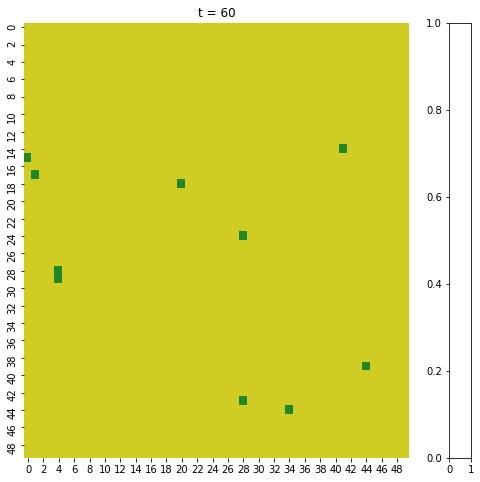

In [ ]:
generate_animation(grids,'1.mp4')

# Part A
Let the probability of initial burning trees be 0.001 and the inital density of the forest is varied. The simulations were ran for t = 100s and the final density of the forest at that time is calculated. Two cases can be considered, one with no immune probability and the one with prob_immune = 0.25

In [ ]:
def tree_density(grid):
    y = grid.flatten()
    y1 = (y == 0).sum()
    return 1 - y1/(grid.shape[0]*grid.shape[1])

9it [00:02,  3.13it/s]


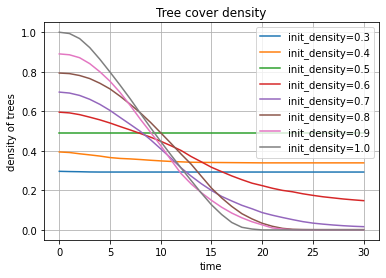

In [ ]:
np.random.seed(8)
init_density = np.arange(0.3,1.1,0.1)
n = 50
#prob_tree = 0.75
prob_burning = 0.005
prob_light = 0
prob_immune = 0
t = 30
tt = np.arange(0,t+1,1)
plt.figure()
for prob_tree in tqdm(init_density, initial=1, position=0):
    den = []
    grids = fire(n, prob_tree, prob_burning, prob_light, prob_immune, t)
    for i in range(t+1):
        den.append(tree_density(grids[i,:,:]))
    plt.plot(tt, den, label='init_density='+str(round(prob_tree,2)))
plt.legend()
plt.title('Tree cover density')
plt.xlabel('time')
plt.ylabel('density of trees')
plt.grid()
plt.show()

In [ ]:
def forest_analysis(n, init_density, prob_burning, prob_light, prob_immune, t):
    #init_density = np.arange(0.1, 1.1, 0.1)
    final_density = []
    for prob_tree in tqdm(init_density, initial=1, position=0):
        sum_den = 0
        for i in range(10):
            np.random.seed(i)
            grids = fire(n, prob_tree, prob_burning, prob_light, prob_immune, t)
            sum_den += tree_density(grids[t,:,:])
        final_density.append(sum_den/10)
    final_density = np.array(final_density)
    return final_density

20it [01:36,  4.80s/it]
20it [01:36,  4.80s/it]
20it [01:36,  4.82s/it]
20it [01:36,  4.82s/it]
20it [01:36,  4.82s/it]
20it [01:36,  4.81s/it]
20it [01:36,  4.80s/it]
20it [01:35,  4.77s/it]
20it [01:35,  4.80s/it]
20it [01:35,  4.78s/it]
11it [16:00, 87.33s/it]
2it [16:00, 480.33s/it]


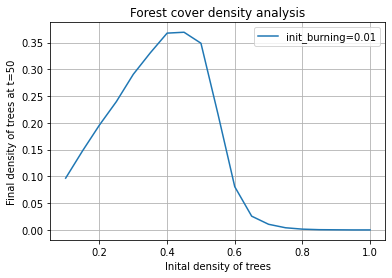

In [ ]:
n = 50
prob_burning = np.array([0.01])
prob_light = 0
prob_immune = 0
t = 50
init_density = np.arange(0.1, 1.05, 0.05)
plt.figure()
for burn in tqdm(prob_burning, initial=1, position=0):
    avg_fin_den = 0
    for exp in tqdm(range(10), initial=1, position=0):
        np.random.seed(exp)
        fin_den = forest_analysis(n, init_density, burn, prob_light, prob_immune, t)
        avg_fin_den += fin_den
    avg_fin_den = avg_fin_den/10
    plt.plot(init_density,avg_fin_den,label='init_burning='+str(burn))
plt.legend()
plt.title('Forest cover density analysis')
plt.xlabel('Inital density of trees')
plt.ylabel('Final density of trees at t=50')
plt.grid()
plt.show()

14it [01:05,  4.66s/it]
14it [01:01,  4.42s/it]
14it [00:58,  4.18s/it]
14it [00:55,  3.97s/it]


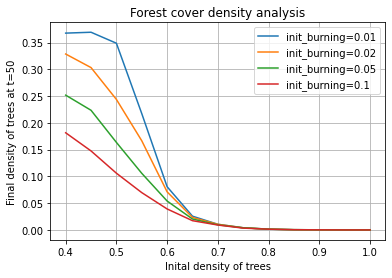

In [ ]:
n = 50
prob_burning = np.array([0.01, 0.02, 0.05, 0.1])
prob_light = 0
prob_immune = 0
t = 50
init_density = np.arange(0.4, 1.05, 0.05)
plt.figure()
for burn in prob_burning:
    fin_den = forest_analysis(n, init_density, burn, prob_light, prob_immune, t)
    plt.plot(init_density,fin_den,label='init_burning='+str(burn))
plt.legend()
plt.title('Forest cover density analysis')
plt.xlabel('Inital density of trees')
plt.ylabel('Final density of trees at t=50')
plt.grid()
plt.show()

14it [00:10,  1.28it/s]
14it [00:41,  2.96s/it]
14it [01:33,  6.69s/it]
14it [02:47, 11.95s/it]
14it [04:21, 18.67s/it]


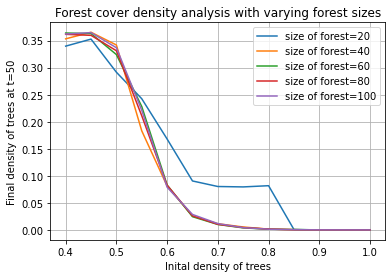

In [ ]:
n = np.array([20, 40, 60, 80, 100])
prob_burning = 0.01
prob_light = 0
prob_immune = 0
t = 50
init_density = np.arange(0.4, 1.05, 0.05)
plt.figure()
for nn in n:
    fin_den = forest_analysis(nn, init_density, prob_burning, prob_light, prob_immune, t)
    plt.plot(init_density,fin_den,label='size of forest='+str(nn))
plt.legend()
plt.title('Forest cover density analysis with varying forest sizes')
plt.xlabel('Inital density of trees')
plt.ylabel('Final density of trees at t=50')
plt.grid()
plt.show()

# Project 9
Fire simulation of 17 x 17 grid forest, all cells covered with trees and initially center tree burning. The probability that a tree catches fire is burnProb which the simulation takes into consideration, the code also returns the percent of forest burnt.

In [ ]:
np.random.seed(2)
n = 17
prob_tree = 1
prob_burning = 0
prob_light = 0
prob_immune = 0.5
# prob_immune = 1 - prob_catch_fire
t = 50
forest = np.ones((n,n))
forest[8][8] = BURNING
grids = np.zeros((t+1, n, n))
grids[0,:,:] = forest
for i in range(1, t+1):
    forest_ext = periodic_lat(forest)
    forest = apply_extended(forest_ext, prob_light, prob_immune)
    grids[i,:,:] = forest


100%|██████████| 51/51 [00:15<00:00,  2.70it/s]

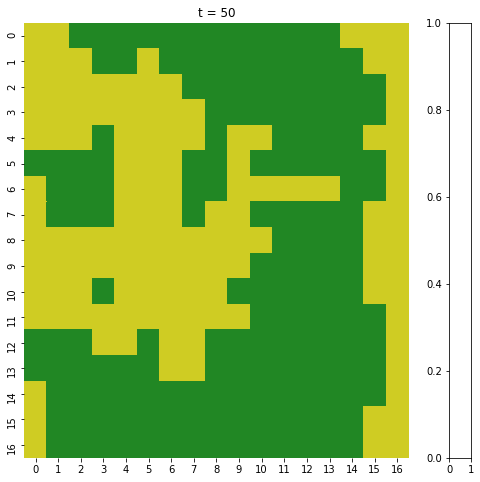

In [ ]:
generate_animation(grids,'2.mp4')

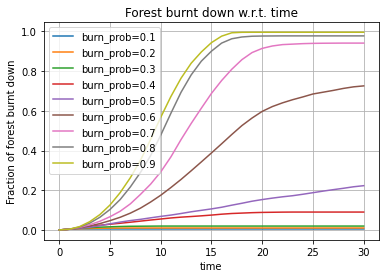

In [ ]:
burn_prob = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
t = 30
tt = np.arange(0,t+1,1)
plt.figure()
for jj in burn_prob:
    prob_immune = 1 - jj
    avg_burn = 0
    for exp in range(10):
        forest = np.ones((n,n))
        forest[8][8] = BURNING
        grids = np.zeros((t+1, n, n))
        grids[0,:,:] = forest
        burn = []
        burn.append(1 - tree_density(forest))
        for i in range(1, t+1):
            forest_ext = periodic_lat(forest)
            forest = apply_extended(forest_ext, prob_light, prob_immune)
            grids[i,:,:] = forest
            burn.append(1 - tree_density(forest))
        avg_burn += np.array(burn)
    avg_burn = avg_burn/10
    plt.plot(tt, avg_burn, label='burn_prob='+str(jj))
plt.legend()
plt.title('Forest burnt down w.r.t. time')
plt.xlabel('time')
plt.ylabel('Fraction of forest burnt down')
plt.grid()
plt.show()

# Excerise 1
A tree takes 2 time steps to burn completely.

In [ ]:
BURN_FIN = 3

In [ ]:
def spread2(site, N, E, S, W, prob_light, prob_immune):
    if(site == EMPTY or site == BURN_FIN):
        return EMPTY
    elif(site == BURNING):
        return BURN_FIN
    else:
        if(N==BURNING or E==BURNING or S==BURNING or W==BURNING 
           or N==BURN_FIN or E==BURN_FIN or S==BURN_FIN or W==BURN_FIN):
            if(np.random.uniform(0,1) < prob_immune):
                return TREE
            else:
                return BURNING
        else:
            if(np.random.uniform(0,1) < prob_light * (1 - prob_immune)):
                return BURNING
            else:
                return TREE

In [ ]:
def apply_extended2(grid, prob_light, prob_immune):
    n = grid.shape[0] - 2
    new_grid = np.zeros((n,n))
    for i in range(1, n+1):
        for j in range(1, n+1):
            site = grid[i][j]
            N = grid[i-1][j]
            E = grid[i][j+1]
            S = grid[i+1][j]
            W = grid[i][j-1]
            new_grid[i-1][j-1] = spread2(site, N, E, S, W, prob_light, prob_immune)
    return new_grid

In [ ]:
def fire2(n, prob_tree, prob_burning, prob_light, prob_immune, t):
    forest = init_forest(n, prob_tree, prob_burning)
    grids = np.zeros((t+1, n, n))
    grids[0,:,:] = forest
    for i in range(1, t+1):
        forest_ext = periodic_lat(forest)
        forest = apply_extended2(forest_ext, prob_light, prob_immune)
        grids[i,:,:] = forest
    return grids

In [ ]:
color_map2 = {0: np.array([255, 255, 0]), # yellow
             1: np.array([0, 180, 0]), # green
             2: np.array([255, 0, 0]), # orange
             3: np.array([255, 0, 0]), # orange
             }  
def colour_forest2(data):
    data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
            data_3d[i][j] = color_map2[data[i][j]]
    return data_3d

In [ ]:
np.random.seed(2)
n = 50
prob_tree = 0.75
prob_burning = 0.001
prob_light = 0
prob_immune = 0
t = 100
grids = fire2(n, prob_tree, prob_burning, prob_light, prob_immune, t)

In [ ]:
def generate_cf2_animation(grids, filename):
    t = grids.shape[0]
    fig, (ax, cbar_ax) = plt.subplots(1, 2, gridspec_kw = grid_kws, figsize=(8, 8))

    def render_frame(i):
        g = sns.heatmap(colour_forest2(grids[i])[0],
            ax = ax,
            cbar_ax = cbar_ax,
            cbar = False,
            # annot = labels,
            vmin = 0,
            vmax = 2,
            cmap=c_map)
        ax.set_title('t = ' + str(i))
        # g.cax.set_visible(False)

    anim = FuncAnimation(fig = fig, func = render_frame, frames=tqdm(np.arange(len(grids)), initial=1), interval = 1000.0/5, blit = False, repeat = False)

    anim.save(filename, writer = 'ffmpeg', fps = 5)



  1%|          | 1/101 [00:00<?, ?it/s]

  2%|▏         | 2/101 [00:00<01:18,  1.26it/s]

  3%|▎         | 3/101 [00:01<01:04,  1.52it/s]

  4%|▍         | 4/101 [00:01<00:55,  1.74it/s]

  5%|▍         | 5/101 [00:01<00:49,  1.92it/s]

  6%|▌         | 6/101 [00:02<00:45,  2.10it/s]

  7%|▋         | 7/101 [00:02<00:42,  2.20it/s]

  8%|▊         | 8/101 [00:03<00:40,  2.28it/s]

  9%|▉         | 9/101 [00:03<00:39,  2.31it/s]

 10%|▉         | 10/101 [00:03<00:39,  2.33it/s]

 11%|█         | 11/101 [00:04<00:39,  2.30it/s]

 12%|█▏        | 12/101 [00:04<00:39,  2.26it/s]

 13%|█▎        | 13/101 [00:05<00:39,  2.21it/s]

 14%|█▍        | 14/101 [00:05<00:40,  2.16it/s]

 15%|█▍        | 15/101 [00:06<00:40,  2.14it/s]

 16%|█▌        | 16/101 [00:06<00:40,  2.08it/s]

 17%|█▋        | 17/101 [00:07<00:40,  2.07it/s]

 18%|█▊        | 18/101 [00:07<00:41,  2.02it/s]

 19%|█▉        | 19/101 [00:08<00:41,  1.99it/s]

 20%|█▉        | 20/101 [00:08<00:41,  1.96it/s]

 21%|██        

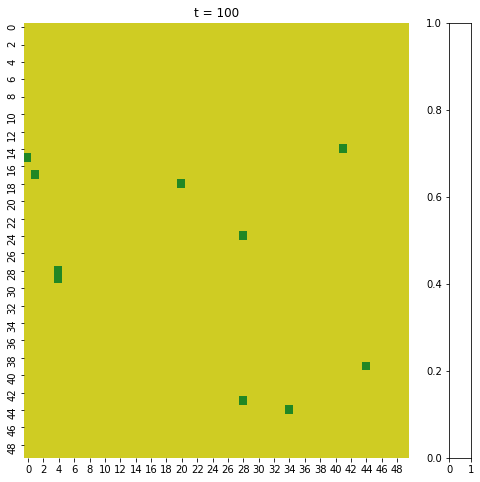

In [ ]:
# t = grids.shape[0]
# fig, (ax, cbar_ax) = plt.subplots(1, 2, gridspec_kw = grid_kws, figsize=(8, 8))

# def init():

#     plt.clf()
#     plt.imshow(colour_forest2(grids[0,:,:]))
#     plt.title('Forest at t = 0')

# def animate(i):
#     plt.clf()
#     plt.imshow(colour_forest2(grids[i,:,:]))
#     plt.title('Forest at t = '+str(i))

generate_animation(grids,'3.mp4')

In [ ]:
def forest_analysis2(n, init_density, prob_burning, prob_light, prob_immune, t):
    #init_density = np.arange(0.1, 1.1, 0.1)
    final_density = []
    for prob_tree in init_density:
        sum_den = 0
        for i in range(10):
            np.random.seed(i)
            grids = fire2(n, prob_tree, prob_burning, prob_light, prob_immune, t)
            sum_den += tree_density(grids[t,:,:])
        final_density.append(sum_den/10)
    final_density = np.array(final_density)
    return final_density

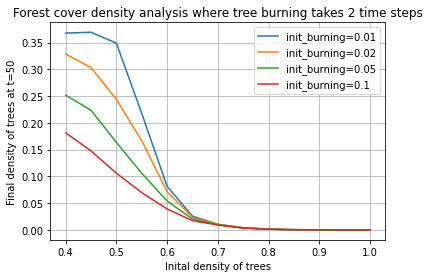

In [ ]:
n = 50
prob_burning = np.array([0.01, 0.02, 0.05, 0.1])
prob_light = 0
prob_immune = 0
t = 50
init_density = np.arange(0.4, 1.05, 0.05)
plt.figure()
for burn in prob_burning:
    fin_den = forest_analysis2(n, init_density, burn, prob_light, prob_immune, t)
    plt.plot(init_density,fin_den,label='init_burning='+str(burn))
plt.legend()
plt.title('Forest cover density analysis where tree burning takes 2 time steps')
plt.xlabel('Inital density of trees')
plt.ylabel('Final density of trees at t=50')
plt.grid()
plt.show()

# Exercise 2
A tree catches on fire from neighboring trees with a probability proportional
to the number of neighbors on fire.

In [ ]:
def spread3(site, N, E, S, W, prob_light, prob_immune):
    if(site == EMPTY or site == BURNING):
        return EMPTY
    else:
        if(N==BURNING or E==BURNING or S==BURNING or W==BURNING):
            prob_immune = 1 - (N+E+S+W)/4
            if(np.random.uniform(0,1) < prob_immune):
                return TREE
            else:
                return BURNING
        else:
            return TREE

def apply_extended3(grid, prob_light, prob_immune):
    n = grid.shape[0] - 2
    new_grid = np.zeros((n,n))
    for i in range(1, n+1):
        for j in range(1, n+1):
            site = grid[i][j]
            N = grid[i-1][j]
            E = grid[i][j+1]
            S = grid[i+1][j]
            W = grid[i][j-1]
            new_grid[i-1][j-1] = spread3(site, N, E, S, W, prob_light, prob_immune)
    return new_grid

def fire3(n, prob_tree, prob_burning, prob_light, prob_immune, t):
    forest = init_forest(n, prob_tree, prob_burning)
    grids = np.zeros((t+1, n, n))
    grids[0,:,:] = forest
    for i in range(1, t+1):
        forest_ext = periodic_lat(forest)
        forest = apply_extended3(forest_ext, prob_light, prob_immune)
        grids[i,:,:] = forest
    return grids

In [ ]:
np.random.seed(2)
n = 50
prob_tree = 0.75
prob_burning = 0.001
prob_light = 0
prob_immune = 0
t = 100
grids = fire3(n, prob_tree, prob_burning, prob_light, prob_immune, t)




  1%|          | 1/101 [00:00<?, ?it/s]


  2%|▏         | 2/101 [00:00<01:06,  1.49it/s]


  3%|▎         | 3/101 [00:01<00:56,  1.74it/s]


  4%|▍         | 4/101 [00:01<00:50,  1.91it/s]


  5%|▍         | 5/101 [00:01<00:45,  2.10it/s]


  6%|▌         | 6/101 [00:02<00:43,  2.20it/s]


  7%|▋         | 7/101 [00:02<00:41,  2.25it/s]


  8%|▊         | 8/101 [00:03<00:40,  2.31it/s]


  9%|▉         | 9/101 [00:03<00:39,  2.33it/s]


 10%|▉         | 10/101 [00:03<00:39,  2.30it/s]


 11%|█         | 11/101 [00:04<00:39,  2.28it/s]


 12%|█▏        | 12/101 [00:04<00:39,  2.28it/s]


 13%|█▎        | 13/101 [00:05<00:39,  2.24it/s]


 14%|█▍        | 14/101 [00:05<00:39,  2.18it/s]


 15%|█▍        | 15/101 [00:06<00:39,  2.16it/s]


 16%|█▌        | 16/101 [00:06<00:40,  2.12it/s]


 17%|█▋        | 17/101 [00:07<00:40,  2.07it/s]


 18%|█▊        | 18/101 [00:07<00:40,  2.04it/s]


 19%|█▉        | 19/101 [00:08<00:41,  1.98it/s]


 20%|█▉        | 20/101 [00:08<00:41,  1.96it

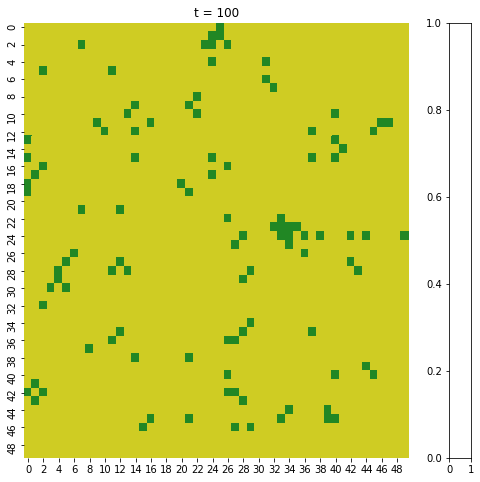

In [ ]:
generate_animation(grids,'4.mp4')

In [ ]:
def forest_analysis3(n, init_density, prob_burning, prob_light, prob_immune, t):
    #init_density = np.arange(0.1, 1.1, 0.1)
    final_density = []
    for prob_tree in init_density:
        sum_den = 0
        for i in range(10):
            np.random.seed(i)
            grids = fire3(n, prob_tree, prob_burning, prob_light, prob_immune, t)
            sum_den += tree_density(grids[t,:,:])
        final_density.append(sum_den/10)
    final_density = np.array(final_density)
    return final_density

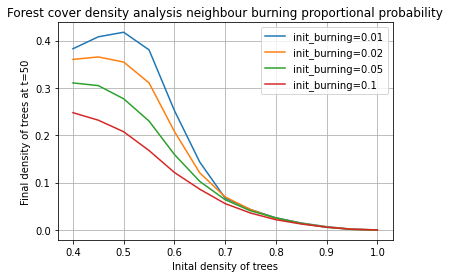

In [ ]:
n = 50
prob_burning = np.array([0.01, 0.02, 0.05, 0.1])
prob_light = 0
prob_immune = 0
t = 50
init_density = np.arange(0.4, 1.05, 0.05)
plt.figure()
for burn in prob_burning:
    fin_den = forest_analysis3(n, init_density, burn, prob_light, prob_immune, t)
    plt.plot(init_density,fin_den,label='init_burning='+str(burn))
plt.legend()
plt.title('Forest cover density analysis neighbour burning proportional probability')
plt.xlabel('Inital density of trees')
plt.ylabel('Final density of trees at t=50')
plt.grid()
plt.show()